**Import Libraries**

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 36.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=79c01dbcb7bd2893a34c5d56e6a89cb9f1208015c2fb87eee810d12b91fbb7c0
  Stored in directory: /tmp/pip-ephem-wheel-cache-2bkthzdz/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=44c07abbe72d19f9c2c2a145adba45d6dc50f0f48da9ba5d50bd3c1aefb7dc3f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import keras as k

<ipython-input-2-69d5237064c4>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_users = pd.read_csv("/content/drive/MyDrive/users.csv")
df_fusers = pd.read_csv("/content/drive/MyDrive/fusers.csv")

In [ ]:
print(df_fusers.shape)
print(df_users.shape)

(3351, 38)
(3474, 42)


**Data Pre-Processing**

In [ ]:
df_fusers.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   3250
lang                                     0
time_zone                             3016
location                               575
default_profile                        317
default_profile_image                 3345
geo_enabled                           3212
profile_image_url                        0
profile_banner_url                    3284
profile_use_background_image             9
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [ ]:
isFake = np.ones(3351)
isNotFake = np.zeros(3474)

In [ ]:
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake

In [ ]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [ ]:
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [ ]:
df_allUsers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,isFake,test_set_1,test_set_2
count,6.825000e+03,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,4066.0,19.0,2294.0,6426.0,...,1.0,0.0,78.0,11.0,0.0,0.0,0.0,6825.000000,3474.000000,3474.000000
mean,8.499737e+08,8667.221685,717.874432,504.022564,2378.999121,9.959853,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.490989,0.287853,0.141048
std,7.662248e+08,23473.945131,12301.657025,1159.286294,8548.235726,112.952257,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.499955,0.452827,0.348121
min,6.780330e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,2.597067e+08,23.000000,12.000000,206.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,6.168972e+08,190.000000,33.000000,312.000000,10.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,1.174963e+09,6900.000000,349.000000,555.000000,1360.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [ ]:
df_allUsers.head

<bound method NDFrame.head of              id                name     screen_name  statuses_count  \
0     616299078       Shandra Watts     shandradsko              68   
1     515162435  Robin Wright Denny   Robin_W_Denny            1760   
2     474513196               Polji      poljiology           16487   
3     616301994       Myrna Hartman       myrnalngj              55   
4     376821900     Chelsea Iversen  chelseaiversen             236   
...         ...                 ...             ...             ...   
6820   72835654       Joseph Cheong    jinglejoseph             871   
6821    6775342  Chingching Bungzen         vangief            1505   
6822  616635785     Esmeralda Doyle      doylebmwvb              44   
6823  169474438    fernando alfredo       f3rn4ndo1               2   
6824  556585952            ▲Tucker▲     MyShotsGone           26826   

      followers_count  friends_count  favourites_count  listed_count  \
0                  19            641                 0             0   
1                 243            393               324             2   
2                 362            243              6079             3   
3                  19            551                 0             0   
4                 168            360                 4             5   
...               ...            ...               ...           ...   
6820              101            501                 0             3   
6821               66            108               296             3   
6822               14            398                 0             0   
6823                1            335                 0             0   
6824              584            424              8618             2   

                          created_at                      url  ...  \
0     Sat Jun 23 15:46:48 +0000 2012                      NaN  ...   
1     Mon Mar 05 06:24:49 +0000 2012                      NaN  ...   
2     Thu Jan 26 02:19:36 +0000 2012  https://t.co/mBTl97mkLw  ...   
3     Sat Jun 23 15:49:30 +0000 2012                      NaN  ...   
4     Tue Sep 20 15:10:29 +0000 2011   http://t.co/1LebyFMJAh  ...   
...                              ...                      ...  ...   
6820  Wed Sep 09 12:02:07 +0000 2009                      NaN  ...   
6821  Tue Jun 12 20:02:33 +0000 2007                      NaN  ...   
6822  Sun Jun 24 01:23:37 +0000 2012                      NaN  ...   
6823  Thu Jul 22 12:38:12 +0000 2010                      NaN  ...   
6824  Wed Apr 18 05:59:45 +0000 2012                      NaN  ...   

     notifications                                        description  \
0              NaN                                                NaN   
1              NaN  Servant of Jesus Christ, Wife, Mom, Life Coach...   
2              NaN                   Global Filipino Biochemist atbp.   
3              NaN  Eail: nynewestmusic@gmail.com..For all Inquiri...   
4              NaN  San Francisco based freelance journalist learn...   
...            ...                                                ...   
6820           NaN                                                NaN   
6821           NaN  English is my second language.  What's your ex...   
6822           NaN  Emprendedores y Startus en los Social Media. P...   
6823           NaN                                                NaN   
6824           NaN     I'm just worried about my momma worrying less.   

     contributors_enabled  following              updated  isFake  \
0                     NaN        NaN  2013-06-12 18:38:35     1.0   
1                     NaN        NaN  2016-03-15 15:59:58     0.0   
2                     NaN        NaN  2016-03-15 16:08:51     0.0   
3                     NaN        NaN  2013-06-12 18:38:26     1.0   
4                     NaN        NaN  2016-03-15 16:03:34     0.0   
...                   ...        ...                  ...     ...   
6820                  NaN        NaN  2013-06-12 18

In [ ]:
Y = df_allUsers.isFake

In [ ]:
Y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: isFake, dtype: float64

In [ ]:
df_allUsers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'is_translator',
       'follow_request_sent', 'protected', 'verified', 'notifications',
       'description', 'contributors_enabled', 'following', 'updated', 'isFake',
       'timestamp', 'crawled_at', 'test_set_1', 'test_set_2'],
      dtype='object')

In [ ]:
df1=df_allUsers[['id','favourites_count','followers_count','statuses_count','friends_count','default_profile','default_profile_image','profile_use_background_image','lang','isFake','utc_offset','listed_count','geo_enabled']]

In [ ]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,lang,isFake,utc_offset,listed_count,geo_enabled
0,616299078,0,19,68,641,1.0,NaN,1.0,en,1.0,NaN,0,NaN
1,515162435,324,243,1760,393,NaN,NaN,1.0,en,0.0,-14400.0,2,NaN
2,474513196,6079,362,16487,243,NaN,NaN,NaN,en,0.0,28800.0,3,1.0
3,616301994,0,19,55,551,1.0,NaN,1.0,en,1.0,NaN,0,NaN
4,376821900,4,168,236,360,NaN,NaN,NaN,en,0.0,-25200.0,5,NaN


In [ ]:
df1.columns

Index(['id', 'favourites_count', 'followers_count', 'statuses_count',
       'friends_count', 'default_profile', 'default_profile_image',
       'profile_use_background_image', 'lang', 'isFake', 'utc_offset',
       'listed_count', 'geo_enabled'],
      dtype='object')

In [ ]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
print(lang_dict)

{'Select Language...': 0, 'ar': 1, 'da': 2, 'de': 3, 'el': 4, 'en': 5, 'en-AU': 6, 'en-GB': 7, 'en-gb': 8, 'es': 9, 'fil': 10, 'fr': 11, 'id': 12, 'it': 13, 'ja': 14, 'ko': 15, 'nl': 16, 'pl': 17, 'pt': 18, 'ru': 19, 'sv': 20, 'tr': 21, 'xx-lc': 22, 'zh-TW': 23, 'zh-cn': 24, 'zh-tw': 25}


In [ ]:
z=df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)

In [ ]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)

In [ ]:
df1.drop(["lang"], axis=1, inplace=True)

In [ ]:
df1.drop(["isFake"], axis=1, inplace=True)

In [ ]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang_num
0,616299078,0,19,68,641,1.0,NaN,1.0,NaN,0,NaN,5
1,515162435,324,243,1760,393,NaN,NaN,1.0,-14400.0,2,NaN,5
2,474513196,6079,362,16487,243,NaN,NaN,NaN,28800.0,3,1.0,5
3,616301994,0,19,55,551,1.0,NaN,1.0,NaN,0,NaN,5
4,376821900,4,168,236,360,NaN,NaN,NaN,-25200.0,5,NaN,5


In [ ]:
df1.isnull().sum()

id                                 0
favourites_count                   0
followers_count                    0
statuses_count                     0
friends_count                      0
default_profile                 2759
default_profile_image           6806
profile_use_background_image     399
utc_offset                      4015
listed_count                       0
geo_enabled                     4531
lang_num                           0
dtype: int64

In [ ]:
df1 = df1.replace(np.nan, 0)

In [ ]:
df1.isnull().sum()

id                              0
favourites_count                0
followers_count                 0
statuses_count                  0
friends_count                   0
default_profile                 0
default_profile_image           0
profile_use_background_image    0
utc_offset                      0
listed_count                    0
geo_enabled                     0
lang_num                        0
dtype: int64

**Input Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 12)
(2048, 12)
(4777,)
(2048,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [ ]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(DecisionTreeClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.98632812, 0.98779297, 0.98632812, 0.98828125, 0.98828125,
       0.9921875 , 0.98828125, 0.99023438, 0.98242188, 0.98535156])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [ ]:
# make predictions for test data
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
z=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.68%


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99365234, 0.99414062, 0.9921875 , 0.9921875 , 0.99316406,
       0.99560547, 0.9921875 , 0.99511719, 0.99169922, 0.9921875 ])

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.07%


**XGB Classifer**

In [ ]:
from xgboost import XGBClassifier
cross_val_score(XGBClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.9921875 , 0.99121094, 0.9921875 , 0.99072266, 0.99316406,
       0.99462891, 0.9921875 , 0.99414062, 0.99169922, 0.99072266])

In [ ]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
x=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.27%


**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
y=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.27%


In [ ]:
import sklearn
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

import seaborn as sns

model = [
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(),
    tree.DecisionTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    svm.SVC(probability=True),
    svm.LinearSVC(),

    ]

In [ ]:
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in model:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    model_compare.loc[row_index, 'model Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    model_compare.loc[row_index, 'model Precission'] = precision_score(y_test, predicted)
    model_compare.loc[row_index, 'model Recall'] = recall_score(y_test, predicted)

model_compare.sort_values(by = ['model Test Accuracy'], ascending = False, inplace = True)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

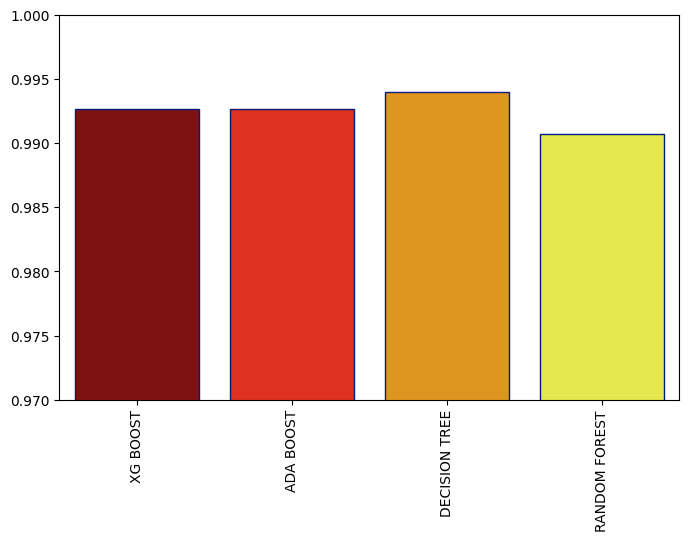

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(8,5))
data = []
data.append(x)
data.append(y)
data.append(0.994)
data.append(c)
labels = ['XG BOOST','ADA BOOST','DECISION TREE','RANDOM FOREST']
sns.barplot(x=labels, y=data, palette='hot', edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylim([0.97,1])
plt

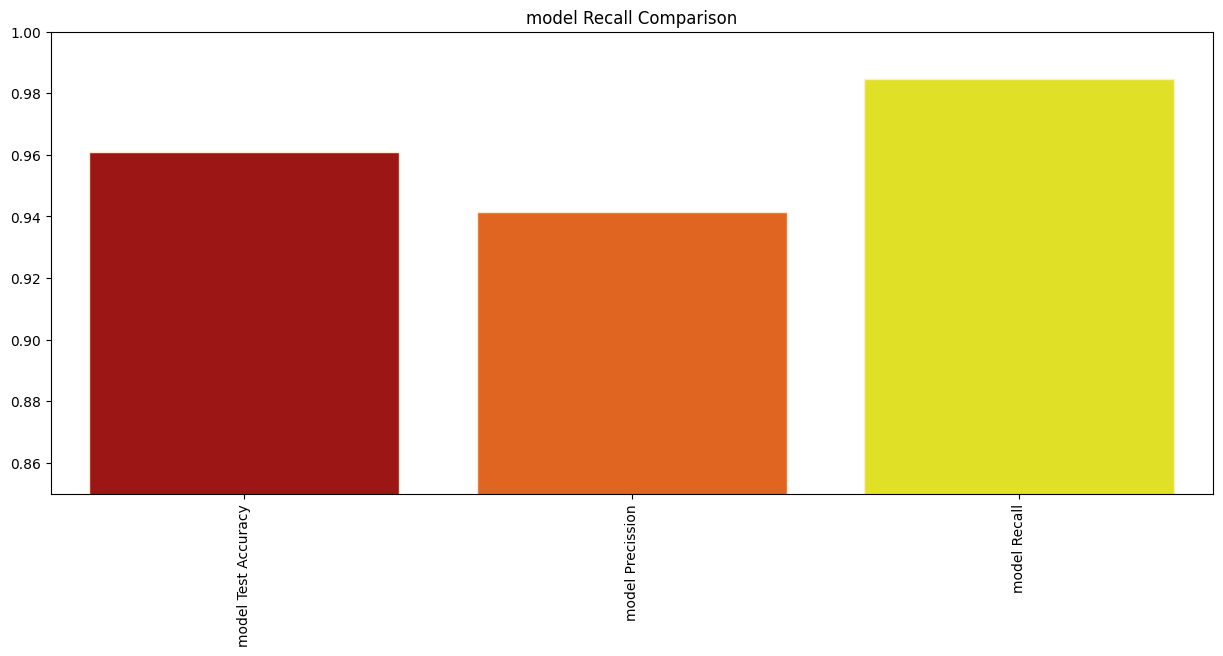

In [ ]:
plt.subplots(figsize=(15,6))
sns.barplot(data=model_compare,palette='hot',edgecolor=sns.color_palette('OrRd',9))
plt.xticks(rotation=90)
plt.ylim([0.85,1])
plt.title('model Recall Comparison')
plt.show()